## Entry Evaluation

In [1]:
# Preamble

%config InlineBackend.figure_formats = ['retina']
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=["olivedrab", "steelblue", "goldenrod", "firebrick"]) 
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['legend.frameon'] = False
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.minor.visible"] = True

#### Compute the numerical derivative of $\sin(x)$ with the backwards difference method and compare to the exact result.

Here, the differential quotient is replaced by the difference quotient
$$\frac{df}{dx} \equiv \frac{y_i - y_{i - 1}}{x_i - x_{i - 1}}$$ and the interval sent to zero.

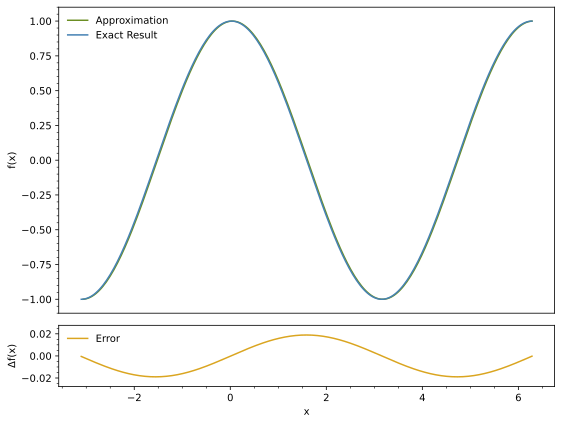

In [2]:
# Generating Values

x = np.pi * np.linspace(-1, 2, 250)
y = np.sin(x)

# Difference Quotient

dy = (y[1:] - y[:-1]) / (x[1] - x[0])

# Figure Setup

fig = plt.figure(figsize=[8,6], tight_layout=True)
grd = mpl.gridspec.GridSpec(2, 1, height_ratios=[5,1], figure=fig)

# Main Subplot

plt.subplot(grd[0])
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.plot(x[1:], dy, label=r"Approximation")
plt.plot(x, np.cos(x), label=r"Exact Result")

plt.ylabel(r"f(x)")

plt.legend(loc='upper left')

# Error Subplot

plt.subplot(grd[1])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)

plt.plot(x[1:], dy - np.cos(x)[1:], label=r"Error", color="goldenrod")

plt.xlabel(r"x")
plt.ylabel(r"$\Delta$f(x)")

top, bot = plt.ylim()
plt.ylim(1.33 * top, 1.33 * bot)

plt.legend(loc='upper left')

plt.show()
plt.close()

#### Approximate the integral of the function $f(x) = \sin(x) + \cos(2x)$ over the given interval $[0, 2\pi]$ using the Riemann sum method. Compare to the exact value and plot the result.

Computing the primitive function $F(x)$ and choosing the arbitrary normalization such that $F(0) = 0$
yields $$F(x) = 1 - \cos(x) + \frac{\sin(2x)}{2}$$ and accordingly $$\int_0^{2\pi}f(x)\,dx = F(2\pi) - F(0) = 0$$
for the definite integral.

Now, the Riemann sum $$\sum_i f_i(x_i) \Delta x_i = \sum_i f_i(x_i) (x_i - x_{i - 1})$$ is implemented.

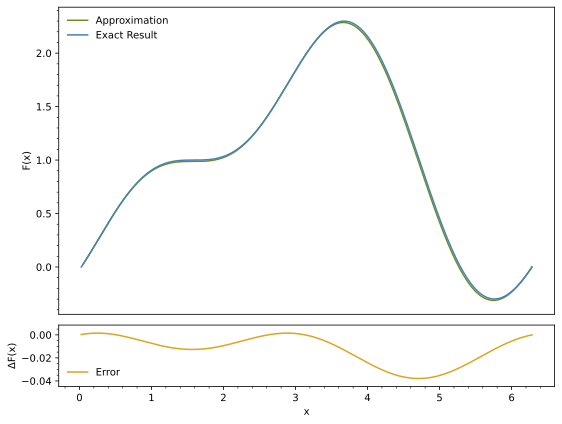

In [3]:
###### Defining Functions

def f(x):
    return np.sin(x) + np.cos(2 * x)

def F(x):
    return 1 - np.cos(x) + np.sin(2 * x) / 2

# Generating Values

x = np.pi * np.linspace(0, 2, 250)
y = f(x)

# Riemann Sum

Y = np.cumsum(y[1:]) * (x[1] - x[0])

# Figure Setup

fig = plt.figure(figsize=[8,6], tight_layout=True)
grd = mpl.gridspec.GridSpec(2, 1, height_ratios=[5,1], figure=fig)

# Main Subplot

plt.subplot(grd[0])
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.plot(x[1:], Y, label=r"Approximation")
plt.plot(x, F(x), label=r"Exact Result")

plt.ylabel(r"F(x)")

plt.legend(loc='upper left')

# Error Subplot

plt.subplot(grd[1])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)

plt.plot(x[1:], Y - F(x)[1:], label=r"Error", color="goldenrod")

plt.xlabel(r"x")
plt.ylabel(r"$\Delta$F(x)")

top, bot = plt.ylim()
plt.ylim(top - 0.005, bot + 0.005)

plt.legend(loc='lower left')

plt.show()
plt.close()

#### Use the Newton-Raphson method to find the effective temperature for a measured luminosity with $L(T) = 4\pi R^2 \sigma T^4$ as the assumed underlying function.

The parameters are given as follows:

$$\begin{align*}
    R &= 7 \cdot 10^8 \:\text{m} \\
    \sigma &= 5.67 \cdot 10^{-8} \:\text{Wm}^{-2\,}\text{K}^{-4} \\
    L_0 &= 3.9 \cdot 10^{26} \:\text{W} \\
    T_0 &= 10^4 \:\text{K}
\end{align*}$$


 Found L(T) = 390 × 10^24 W for T = 5781 K after 5 iterations compared to the desired value of L = 390 × 10^24 W 



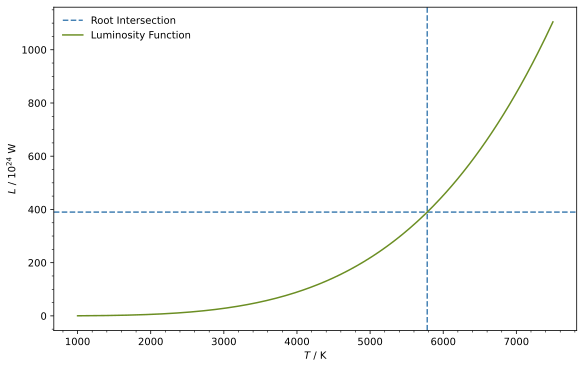

In [4]:
# Setting Parameters

R = 7e8
s = 5.67e-8
L0 = 3.9e26
T0 = 1e4

# Defining Functions

def L(T):
    return 4 * np.pi * R**2 * s * T**4

def dL(T):
    return 16 * np.pi * R**2 * s * T**3

# Newton-Raphson Method

e = 1e-6
T = T0

i = 0
while abs((L(T) - L0) / L0) > e:
    T = T - (L(T) - L0) / dL(T)
    i += 1

l1 = f"Found L(T) = {L(T) / 1e24:.0f} × 10^24 W for T = {T:.0f} K after {i} iterations"
l2 = f"compared to the desired value of L = {L0 / 1e24:.0f} × 10^24 W"
print("\n", l1, l2, "\n")

# Generating Values

t = np.linspace(1e3, 7.5e3, 250)
l = L(t)

# Plotting

plt.axhline(L0 / 1e24, ls='--', c='steelblue', label="Root Intersection")
plt.axvline(T, ls='--', c='steelblue')
plt.plot(t, l / 1e24, label="Luminosity Function")

plt.xlabel(r"$T$ / K")
plt.ylabel(r"$L$ / $10^{24}$ W")

plt.legend()

plt.show()
plt.close()